# <center>Outlier Treatment Using the Percentile Method and Winsorization Technique</center>

#### Percentile Method

The Percentile Method is a simple technique for detecting and treating outliers based on the distribution of data. This method involves setting thresholds at specific percentiles, beyond which data points are considered outliers.

##### Steps for Outlier Detection and Treatment Using the Percentile Method

1. **Determine the Percentile Thresholds:**
   - Common thresholds include the 1st and 99th percentiles or the 5th and 95th percentiles, depending on how conservative you want to be in detecting outliers.

2. **Calculate the Threshold Values:**
   - Identify the values at these percentiles in your dataset. For example, the 1st percentile might be the value below which 1% of your data falls, and the 99th percentile might be the value above which 1% of your data falls.

3. **Identify Outliers:**
   - Any data point below the lower threshold (e.g., 1st percentile) or above the upper threshold (e.g., 99th percentile) is considered an outlier.

4. **Remove or Treat Outliers:**
   - Outliers can either be removed or treated using a method like Winsorization, capping, or replacing with a threshold value.

#### Winsorization Technique

Winsorization is a robust technique for reducing the effect of outliers by limiting extreme values in the data. Instead of removing outliers, Winsorization involves capping the extreme values at a specific percentile.

##### Steps for Winsorization

1. **Set the Percentile Limits:**
   - Decide on the percentiles at which you will cap the data, such as the 5th and 95th percentiles.

2. **Calculate the Threshold Values:**
   - Identify the values at these percentiles in your dataset.

3. **Cap the Data:**
   - Replace any data points below the lower percentile threshold with the value at the 5th percentile.
   - Replace any data points above the upper percentile threshold with the value at the 95th percentile.

4. **Result:**
   - The dataset is now "Winsorized," meaning that the extreme values have been capped, reducing the impact of outliers on your analysis or model.

#### Example

Suppose you have a dataset: `[10, 12, 14, 15, 18, 22, 26, 29, 30, 100]`

**Percentile Method:**

- **Step 1:** Set thresholds at the 5th and 95th percentiles.
- **Step 2:** Calculate the values at these percentiles (e.g., 5th percentile = 12, 95th percentile = 30).
- **Step 3:** Identify outliers: In this case, `10` and `100` might be outliers.
- **Step 4:** Remove or treat these outliers.

**Winsorization:**

- **Step 1:** Set limits at the 5th and 95th percentiles.
- **Step 2:** Calculate the threshold values: 12 and 30.
- **Step 3:** Cap the data:
  - Replace `10` with `12`.
  - Replace `100` with `30`.
  
The resulting dataset after Winsorization would be: `[12, 12, 14, 15, 18, 22, 26, 29, 30, 30]`.

### Conclusion

The Percentile Method and Winsorization Technique are effective methods for handling outliers, particularly in cases where you want to minimize their impact without removing too much data. The choice between these methods depends on the specific context and requirements of your analysis or machine learning model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

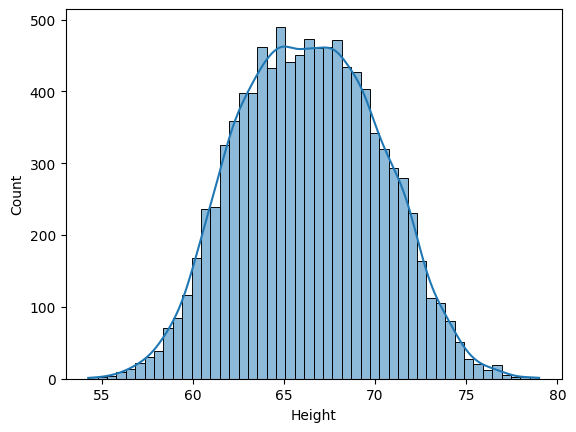

In [6]:
sns.histplot(df['Height'], kde=True)

<Axes: ylabel='Height'>

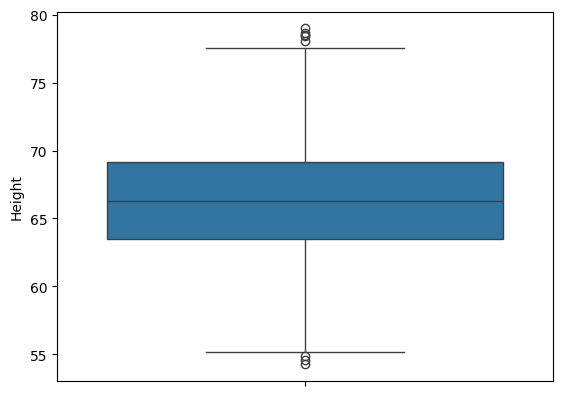

In [7]:
sns.boxplot(df['Height'])

In [8]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [9]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [10]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

new_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [12]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

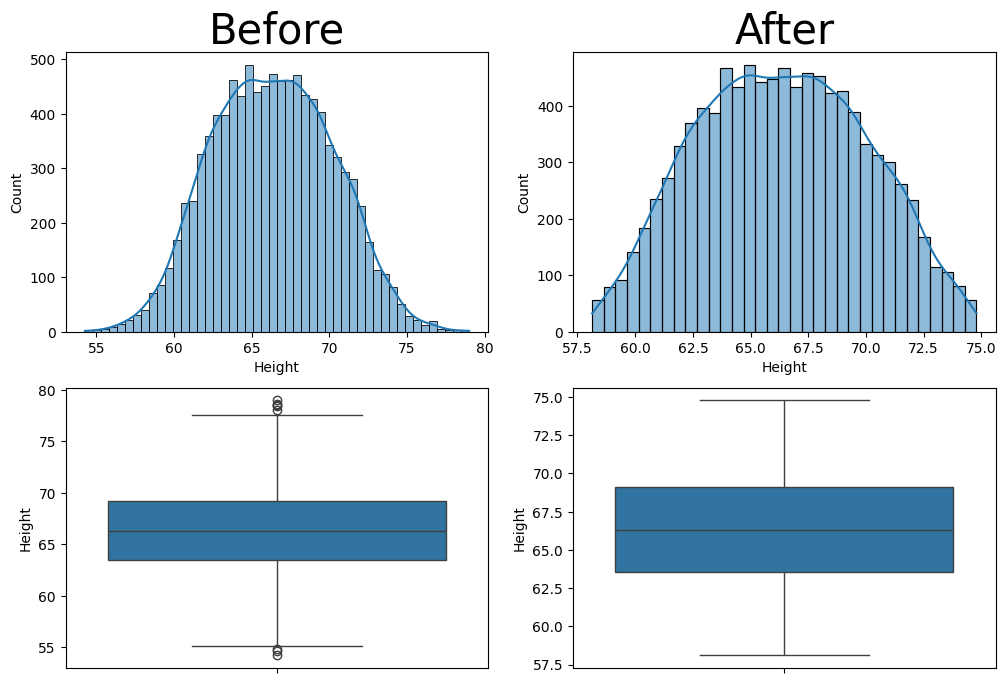

In [13]:
# comparing before and after
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sns.histplot(df['Height'], kde=True)
plt.title('Before', fontsize=30)

plt.subplot(2,2,2)
sns.histplot(new_df['Height'], kde=True)
plt.title('After', fontsize=30)

plt.subplot(2,2,3)
sns.boxplot(df['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'])

plt.show()

In [14]:
# Capping --> (also known as Winsorization)

df['Height'] = np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']        
    )
)


In [15]:
df.shape

(10000, 3)

In [16]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

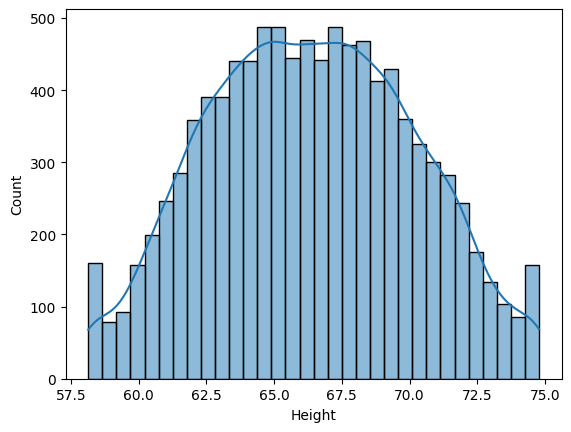

In [17]:
sns.histplot(df['Height'], kde=True) # here we observe that there is no outliers

<Axes: ylabel='Height'>

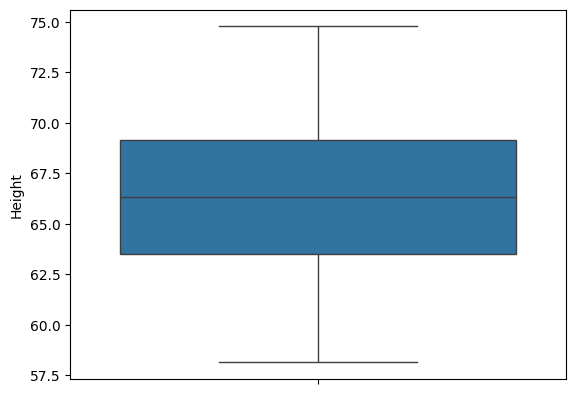

In [18]:
sns.boxplot(df['Height']) # here we observe that there is no outliers